First 5 rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               age          bmi     childre

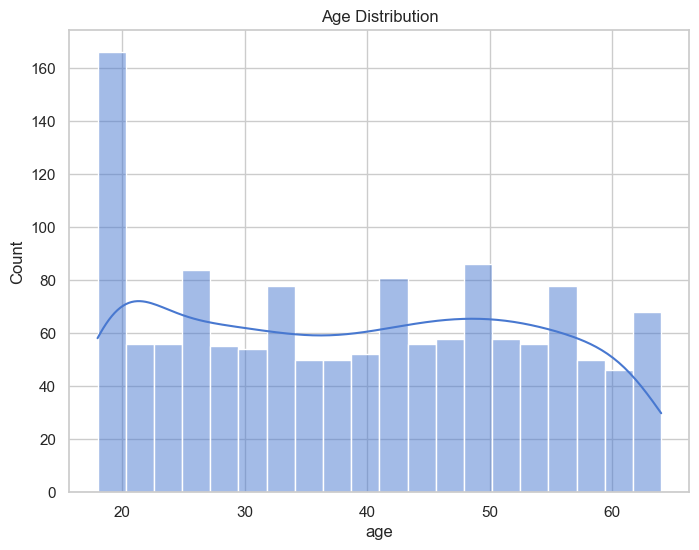

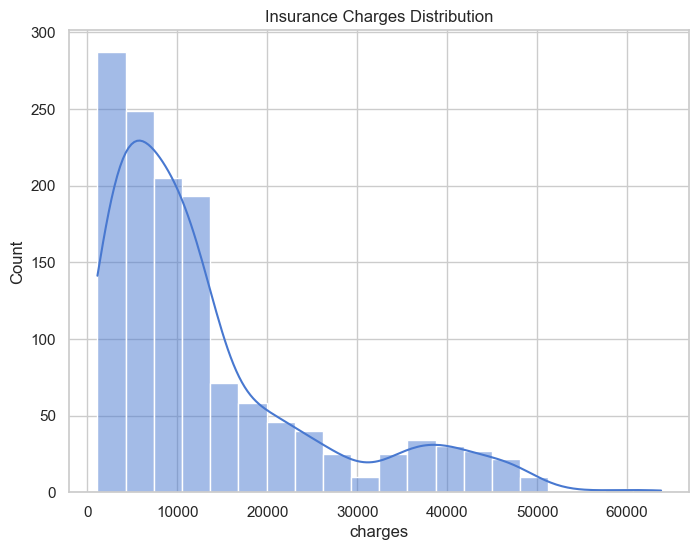

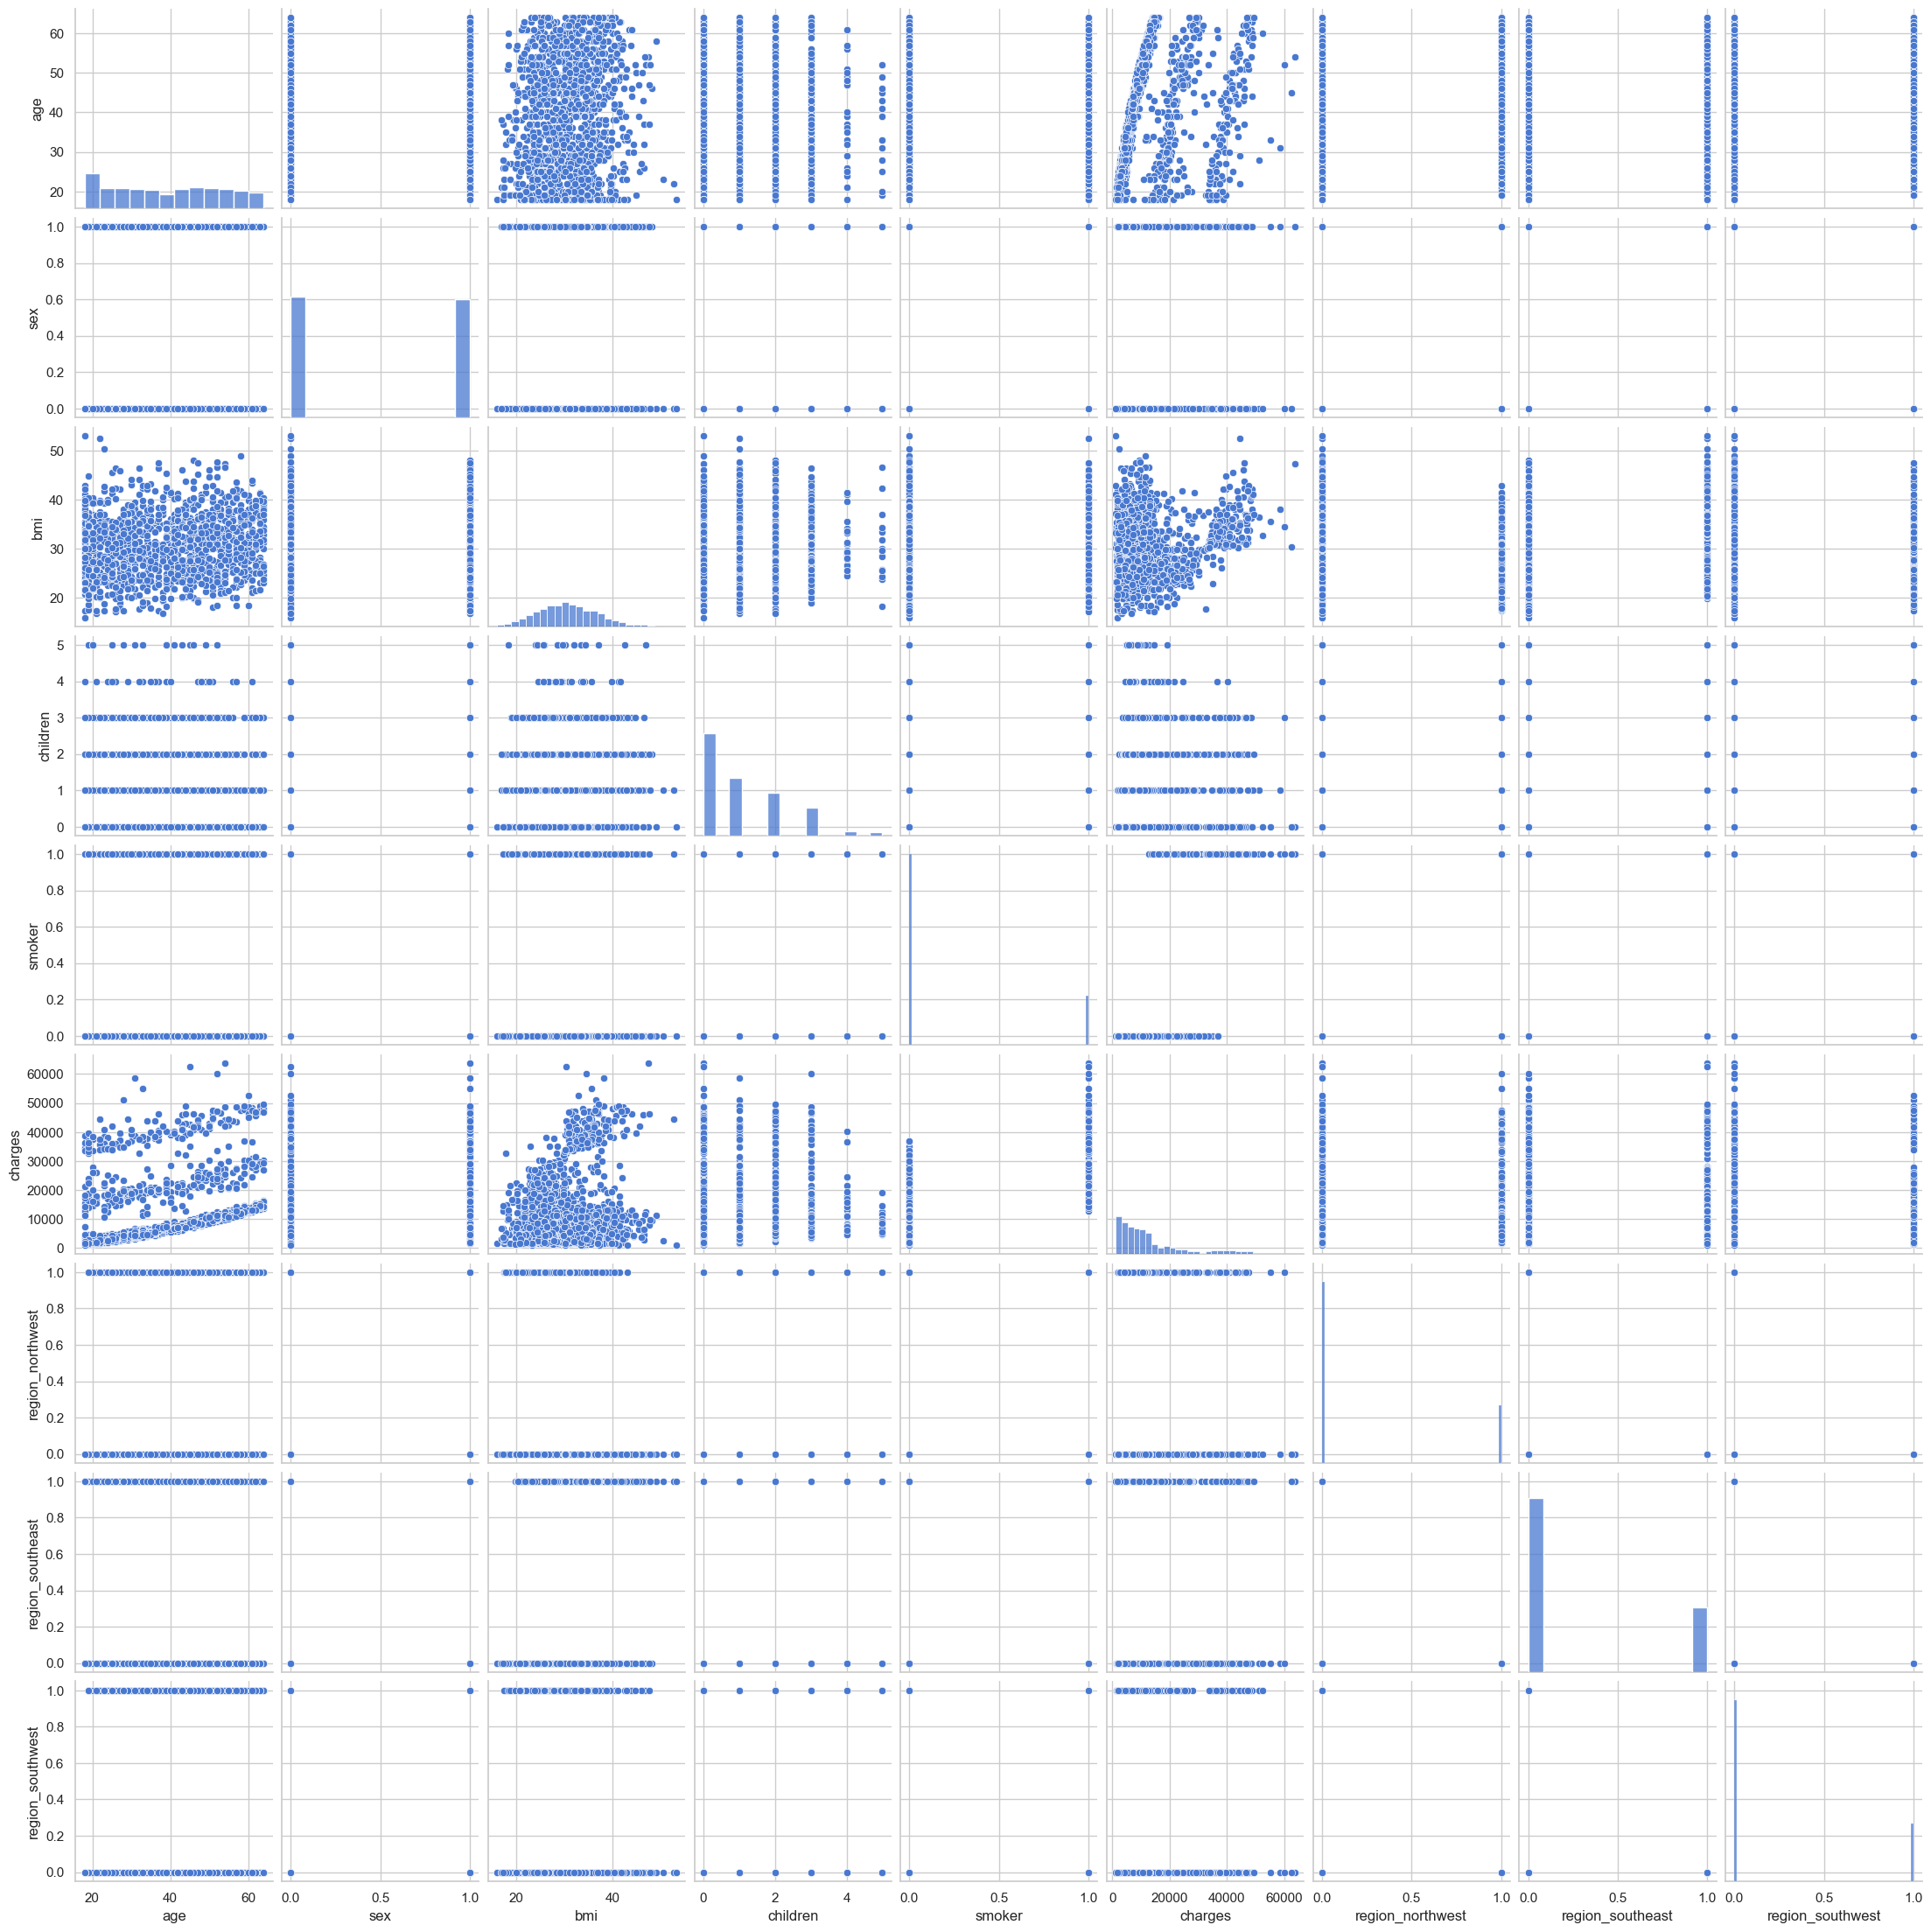

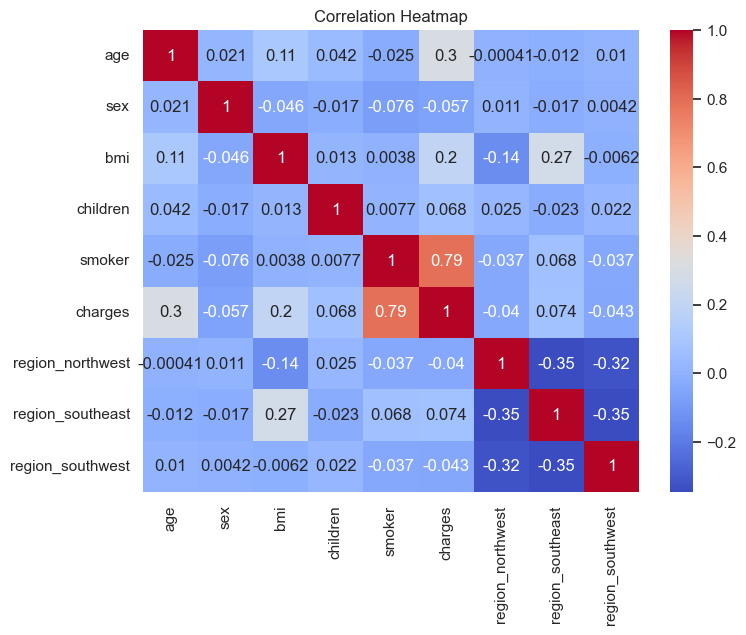

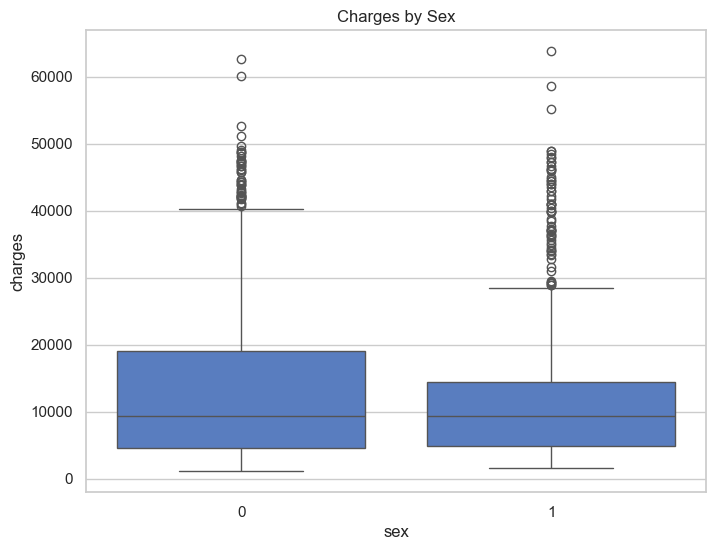

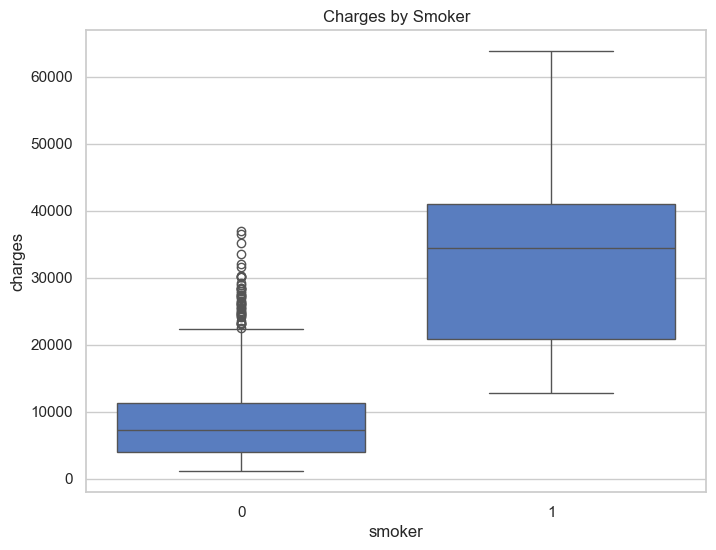


Training samples: 1070
Test samples: 268

Model Performance:
R² Score: 0.7835929767120724
RMSE: 5796.284659276272

Feature Importance:
             Feature   Coefficient
4            smoker  23651.128856
3          children    425.278784
2               bmi    337.092552
0               age    256.975706
1               sex     18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354

Next steps:
- Explore advanced models (Random Forest, XGBoost)
- Validate model performance using cross-validation
- Prepare interim report for submission


In [21]:
# ----------------------------------------
# Interim EDA for Insurance Risk Analytics
# ----------------------------------------

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Optional: make plots look nicer
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8,6)

# Step 2: Load the dataset
df = pd.read_csv("C:/Users/hp/Documents/insurance-risk-analytics/data/raw/insurance.csv")

# Step 3: Quick look at data
print("First 5 rows:\n", df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# Step 4: Encode categorical columns
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_cols)

# Encode binary columns
for col in ['sex', 'smoker']:
    if col in categorical_cols:
        df[col] = df[col].map({'male': 0, 'female': 1, 'no': 0, 'yes': 1})
        categorical_cols.remove(col)

# One-hot encode remaining categorical columns (e.g., 'region')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 5: Visualizations
# Age distribution
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

# Charges distribution
sns.histplot(df['charges'], kde=True, bins=20)
plt.title("Insurance Charges Distribution")
plt.show()

# Pairplot (numeric columns)
sns.pairplot(df)
plt.show()

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Charges by sex
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Sex")
plt.show()

# Charges by smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker")
plt.show()

# Step 6: Split dataset for modeling
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

# Step 7: Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Model Performance
print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred))

# RMSE compatible with all sklearn versions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Step 9: Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:\n", coefficients)

# Step 10: Next steps
print("\nNext steps:")
print("- Explore advanced models (Random Forest, XGBoost)")
print("- Validate model performance using cross-validation")
print("- Prepare interim report for submission")
